In [12]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("dark")
sns.set(rc={'figure.figsize':(10, 8)})

from typing import List, Callable

from models import LIF, Adaptive, AdaptiveExponential

In [2]:
import math


I_constant = lambda x: 5
I_step = lambda x: 5.5 if int(x / 10) % 2 == 0 else 0
I_sin = lambda x: 4 * (math.sin(x) + 0.9)
I_linear = lambda x: 0.04 * x + 4
I_x2 = lambda x: pow(x - 50, 2) *0.004

In [3]:
dt = 0.03125

def u_t(u: List[float], I: Callable[[int], float], desc: str):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)
    
    ax1.plot(list(map(lambda x: dt * x, range(len(u)))), u)
    ax1.set_ylabel('Membrance Potential (mV)')
    
    ax2.plot(list(map(lambda x: x * dt, range(len(u)))), list(map(I, list(map(lambda x: x * dt, range(len(u)))))), color='orange')
    ax2.set_xlabel('Time (ms)')
    ax2.set_ylabel('Input Current (nA)')

    plt.gcf().text(0.85, 0.35, desc, fontsize=14)
    plt.show()

In [4]:
def u_w_t(u: List[float], w: List[float], I: Callable[[int], float], desc: str):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True)
    
    ax1.plot(list(map(lambda x: dt * x, range(len(u)))), u)
    ax1.set_ylabel('Membrance Potential (mV)')
    
    ax2.plot(list(map(lambda x: dt * x, range(len(w)))), w, color='green')
    ax2.set_ylabel('Adaptation Current (nA)')
    
    ax3.plot(list(map(lambda x: x * dt, range(len(u)))), list(map(I, list(map(lambda x: x * dt, range(len(u)))))), color='orange')
    ax3.set_xlabel('Time (ms)')
    ax3.set_ylabel('Input Current (nA)')

    plt.gcf().text(0.85, 0.35, desc, fontsize=14)
    plt.show()

## LIF

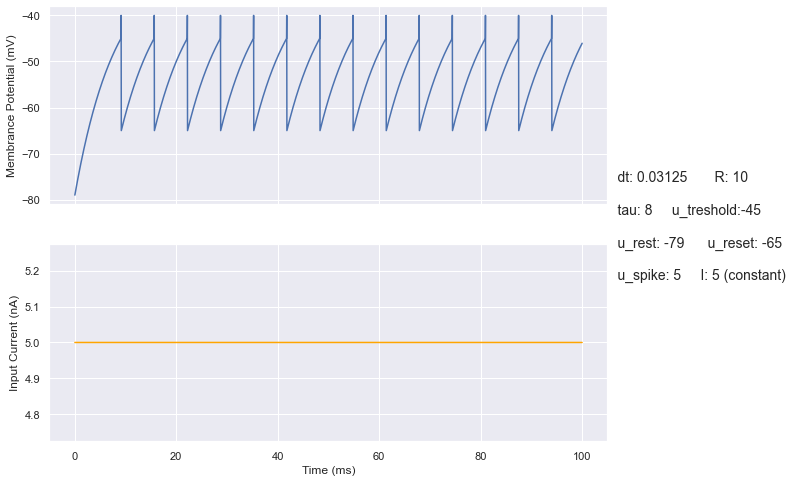

In [5]:
lif = LIF(I=I_constant)
lif.execute(100)
u_t(lif.u, I_constant, lif.__repr__("5 (constant)"))

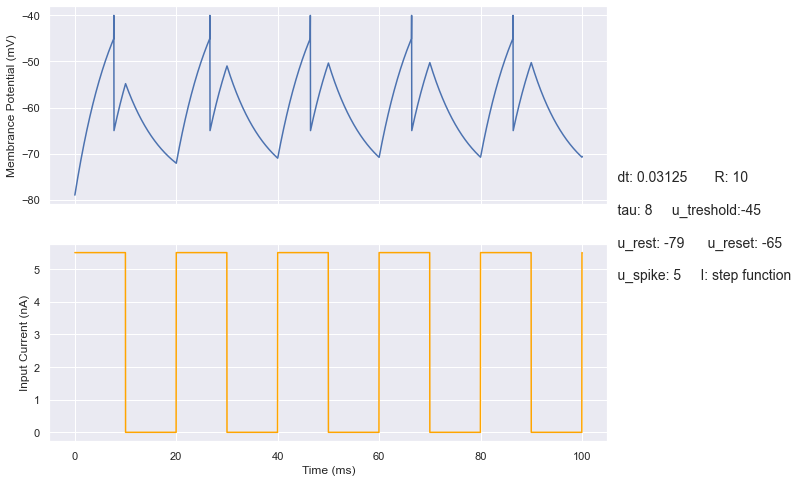

In [6]:
lif = LIF(I=I_step)
lif.execute(100)
u_t(lif.u, I_step, lif.__repr__("step function"))

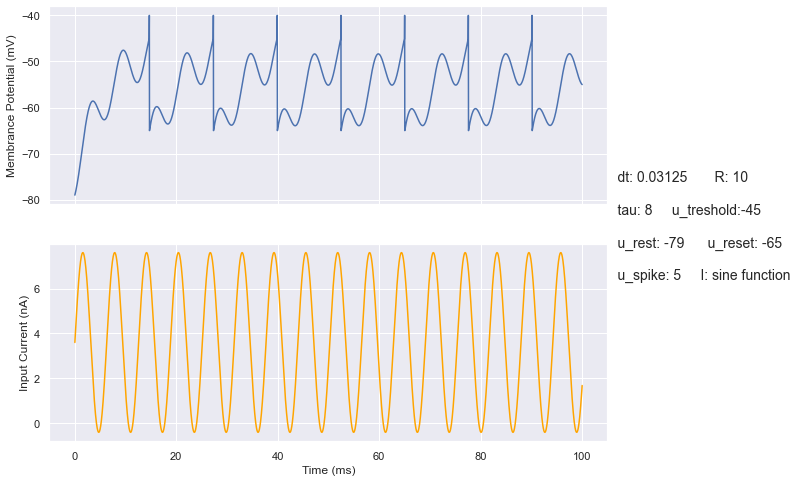

In [7]:
lif = LIF(I=I_sin)
lif.execute(100)
u_t(lif.u, I_sin, lif.__repr__("sine function"))

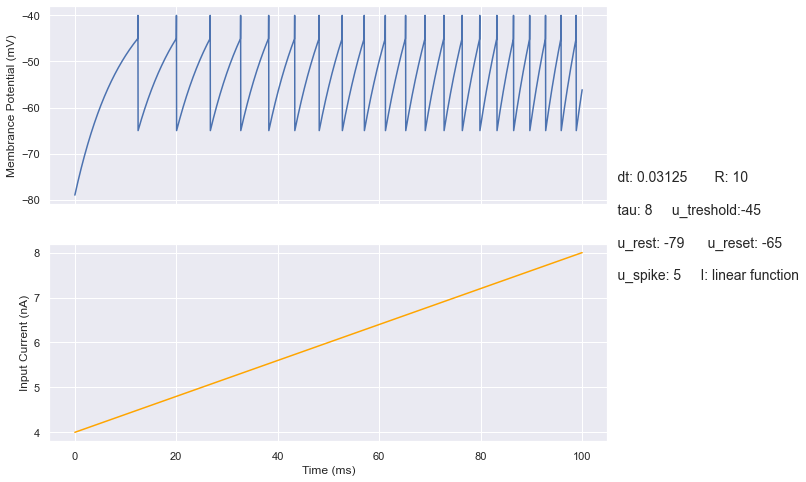

In [8]:
lif = LIF(I=I_linear)
lif.execute(100)
u_t(lif.u, I_linear, lif.__repr__("linear function"))

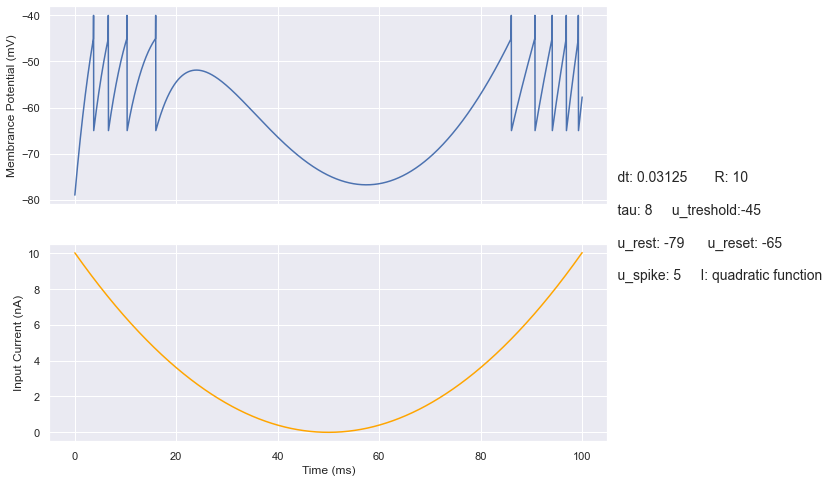

In [9]:
lif = LIF(I=I_x2)
lif.execute(100)
u_t(lif.u, I_x2, lif.__repr__("quadratic function"))

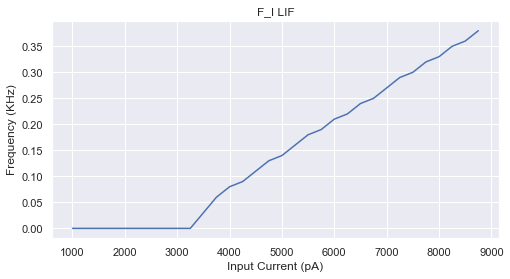

In [10]:
dummy = []

for i in range(1000, 9000, 250):
    lif = LIF(I=lambda x: i / 1000)
    lif.execute(100)
    dummy.append(len(lif.fires) / 100)

plt.figure(figsize=(8,4))
plt.plot(list(range(1000, 9000, 250)), dummy)
axis = plt.gca()
axis.set_xlabel("Input Current (pA)")
axis.set_ylabel("Frequency (KHz)")
plt.title("F_I LIF")
plt.show()

## ALIF

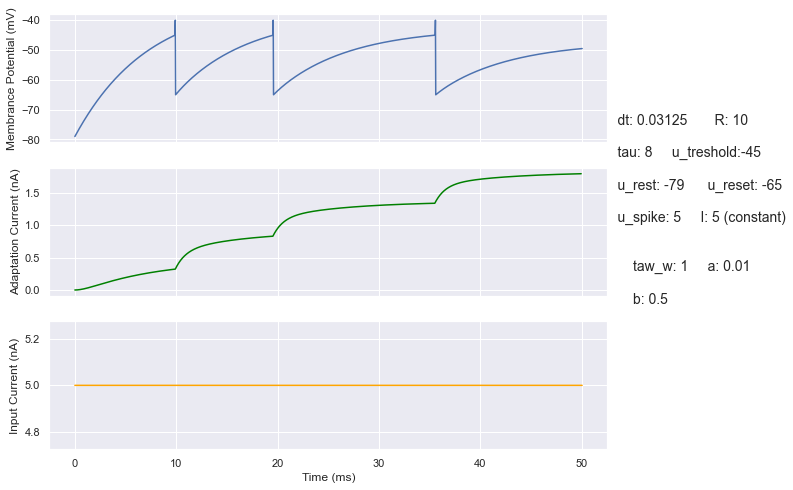

In [14]:
alif = LIF(I=I_constant, strategy=Adaptive())
alif.execute(50)
u_w_t(alif.u, w=alif.w, I=I_constant, desc=alif.__repr__("5 (constant)"))

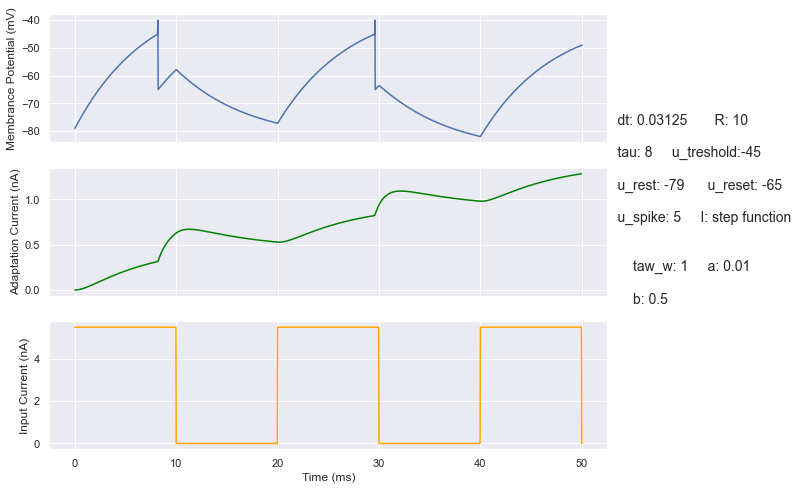

In [16]:
alif = LIF(I=I_step, strategy=Adaptive())
alif.execute(50)
u_w_t(alif.u, w=alif.w, I=I_step, desc=alif.__repr__("step function"))

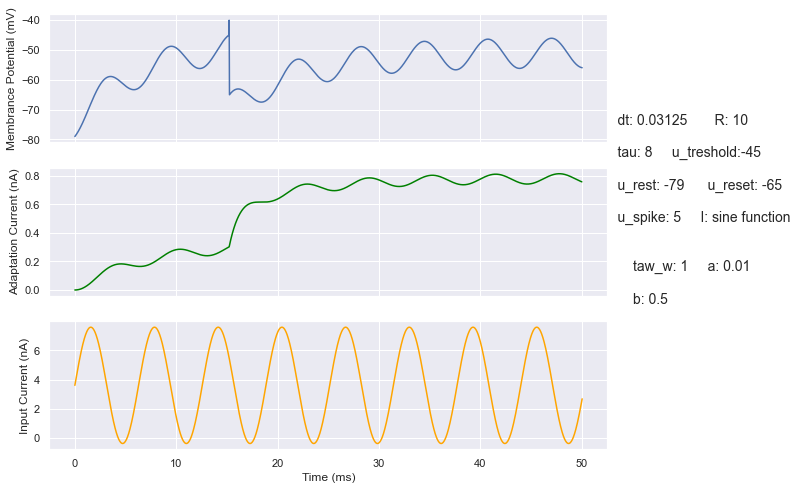

In [17]:
alif = LIF(I=I_sin, strategy=Adaptive())
alif.execute(50)
u_w_t(alif.u, w=alif.w, I=I_sin, desc=alif.__repr__("sine function"))

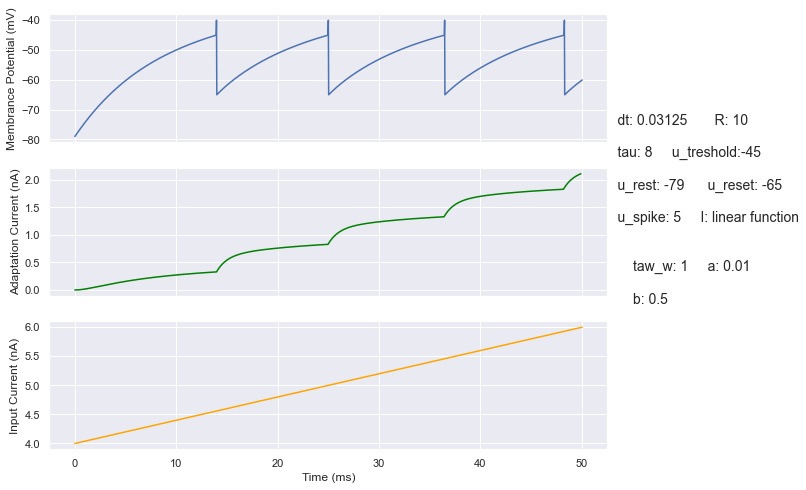

In [19]:
alif = LIF(I=I_linear, strategy=Adaptive())
alif.execute(50)
u_w_t(alif.u, w=alif.w, I=I_linear, desc=alif.__repr__("linear function"))

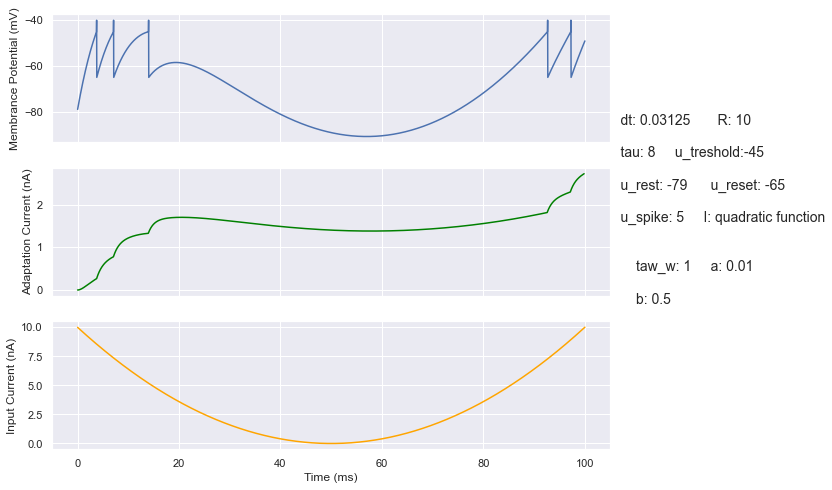

In [20]:
alif = LIF(I=I_x2, strategy=Adaptive())
alif.execute(100)
u_w_t(alif.u, w=alif.w, I=I_x2, desc=alif.__repr__("quadratic function"))

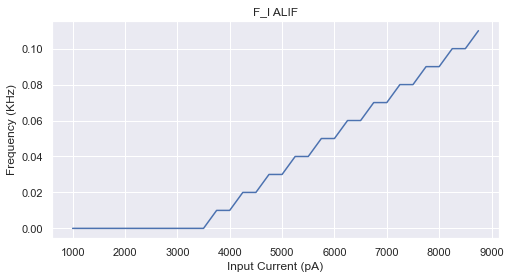

In [21]:
dummy = []

for i in range(1000, 9000, 250):
    lif = LIF(I=lambda x: i / 1000, strategy=Adaptive())
    lif.execute(100)
    dummy.append(len(lif.fires) / 100)

plt.figure(figsize=(8,4))
plt.plot(list(range(1000, 9000, 250)), dummy)
axis = plt.gca()
axis.set_xlabel("Input Current (pA)")
axis.set_ylabel("Frequency (KHz)")
plt.title("F_I ALIF")
plt.show()

## AELIF

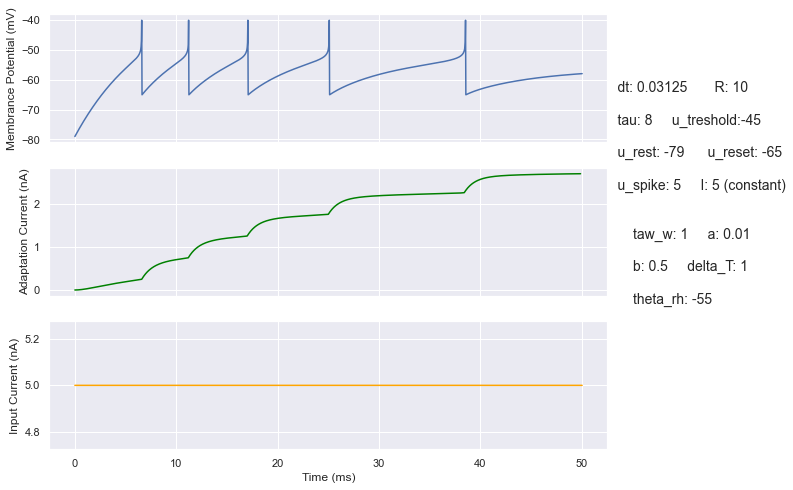

In [22]:
aelif = LIF(I=I_constant, strategy=AdaptiveExponential())
aelif.execute(50)
u_w_t(aelif.u, w=aelif.w, I=I_constant, desc=aelif.__repr__("5 (constant)"))

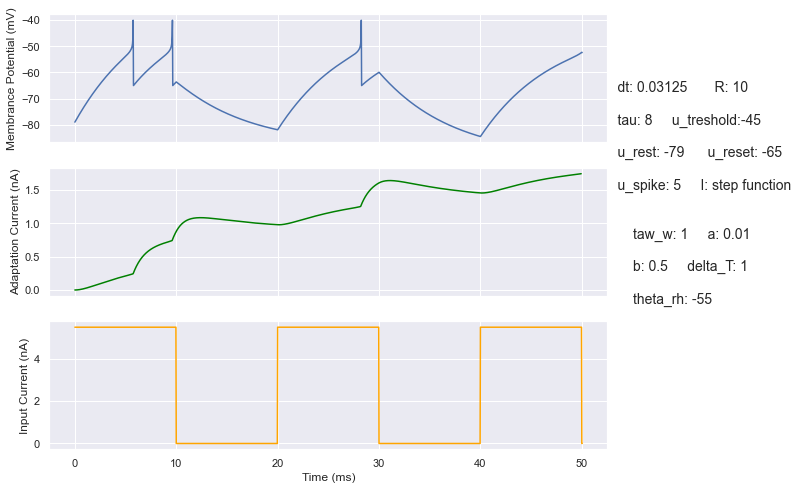

In [23]:
aelif = LIF(I=I_step, strategy=AdaptiveExponential())
aelif.execute(50)
u_w_t(aelif.u, w=aelif.w, I=I_step, desc=aelif.__repr__("step function"))

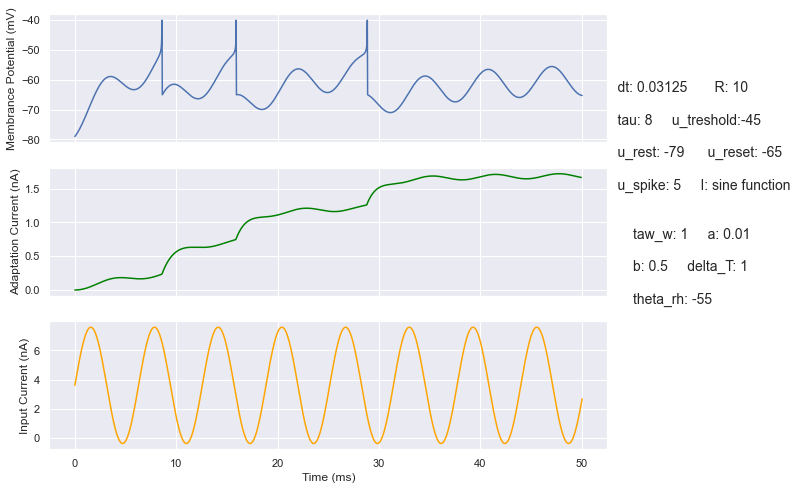

In [25]:
aelif = LIF(I=I_sin, strategy=AdaptiveExponential())
aelif.execute(50)
u_w_t(aelif.u, w=aelif.w, I=I_sin, desc=aelif.__repr__("sine function"))

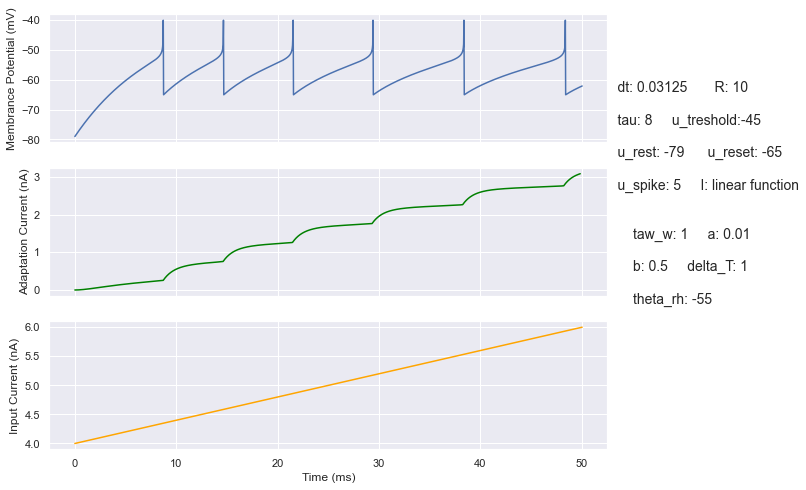

In [26]:
aelif = LIF(I=I_linear, strategy=AdaptiveExponential())
aelif.execute(50)
u_w_t(aelif.u, w=aelif.w, I=I_linear, desc=aelif.__repr__("linear function"))

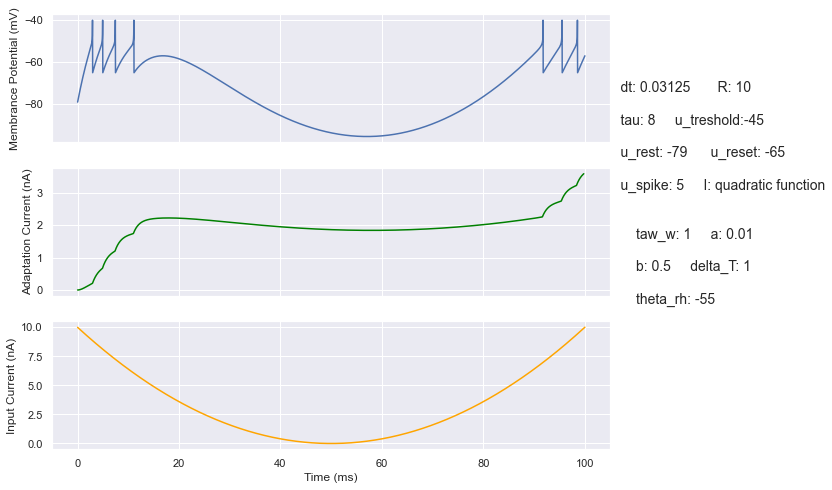

In [27]:
aelif = LIF(I=I_x2, strategy=AdaptiveExponential())
aelif.execute(100)
u_w_t(aelif.u, w=aelif.w, I=I_x2, desc=aelif.__repr__("quadratic function"))

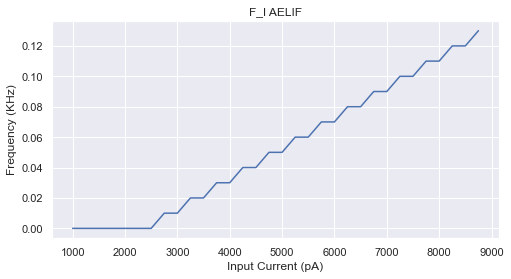

In [28]:
dummy = []

for i in range(1000, 9000, 250):
    lif = LIF(I=lambda x: i / 1000, strategy=AdaptiveExponential())
    lif.execute(100)
    dummy.append(len(lif.fires) / 100)

plt.figure(figsize=(8,4))
plt.plot(list(range(1000, 9000, 250)), dummy)
axis = plt.gca()
axis.set_xlabel("Input Current (pA)")
axis.set_ylabel("Frequency (KHz)")
plt.title("F_I AELIF")
plt.show()